
# Przygotowanie

Przygotowanie
Przed rozpoczęciem pracy z notatnikiem proszę zmienić jego nazwę dodając na początku numer albumu, imię i nazwisko. {nr_albumu}_{imię}_{nazwisko}_{nazwa}

Po wykonaniu wszystkich zadań proszę przesłać wypełniony notatnik przez platformę ELF za pomocą formularza "Prześlij projekt" w odpowiedniej sekcji.

# Support Vector Machine

Jest to jeden z najbardziej rozpowszechnionych i wszechstronnych modeli uczenia maszynowego. Z jego uzyciem dokonac mozna klasyfikacji liniowej (SVC), nieliniowej jak i regresji (SVR). Na poniższej grafice przedstawione zostało działanie klasyfikatora.

![svc](svc.png)

Analizujac grafike dostrzec mozna dwie oddzielne klasy oddzielone za pomoca prostej. Widoczna linia ciagła rozdziela klasy, a przerywane linie oznaczają margines, czyli możliwe najdalsze oddalenie elementu (np. nowego) jaki zakwalifikowany
zostanie do danej klasy. Maszyny SVM czułe sa na skale danych, przed ich uzyciem zawsze powinna zostać przeprowadzona normalizacja danych (np. min-max, lub standaryzacja).

![svc_example](svc2.jpg)

Równowage pomiedzy marginesami możemy regulować za pomoca hipermarapetru
C. Mniejsze jego wartości poszerzają granice, jednocześnie wprowadzając
więcej jej naruszeń. Im margines jest szerszy, tym własciwosci generalizujace
jakie posiada klasyfikator będę większe. Mniejsza staje się podatność na przeuczenie
(ang. overfitting), ale zmniejsza się skuteczność klasyfikatora. Szukany jest
taki klasyfikator, który podzieli przestrzeń na dwa rozłaczne zbiory odpowiadajace
dwóm klasom, w możliwie optymalny sposób. Podejście opiera się na
znalezieniu granicy decyzyjnej.

Wektory nośne (Support vectors) są to obserwacje (data points), które wystepują najbliżej hiperpłaszczyzny. Punkty te, pomagają lepiej wyznaczyć linię separacji pomiędzy klasami poprzez obliczenie marginesów. Są to najbardziej znaczace obserwacje ze zbioru z punktu widzenia konstrukcji klasyfikatora.

Warto zaznaczyć, że za pomocą klasyfikatora SVC można klasyfikaować dane, które nie są linowo separowalne. Można to osiągnąć przez tzw "sztuczkę kernelową", dzięki czemu możliwe jest zmapowanie obserwacji do wielowymiarowej przestrzeni. Klasyfikator z biblioteki Sklearn posiada parametr *kernel*, który pozwala na zmianę jądra. Dodatkowo, parametr *gamma* pozwala na modyfikację działania samego kernela.

Warto zaznaczyć, że SVC dobrze nadaje się do niewielkich zbiorów danych, gdyż w przypadku dużej ilości staję się on mało wydajny.

Funkcja jaka jest minimalizowana podczas działania klasyfikatora wygląda następująco:

\begin{equation}
min C \sum^m_{i=1}[y^{(i)}cost_{1}(\theta^{T}x^{(i)}) - (1 - y^{(i)})cost_{0}(\theta^{T}x^{(i)})] + \frac{1}{2} \sum^{n}_{i=1}\theta^{2}_{j}
\end{equation}

## Zadanie 0 

Wczytanie danych ze zbioru oraz wizualizacja.

In [1]:
import pandas as pd

data_input = pd.read_csv('./Ankieta.csv')
data_input.head()

,waga,wzrost,plec
0,55,160,Kobieta
1,78,180,Mezczyzna
2,55,150,Kobieta
3,99,196,Mezczyzna
4,90,180,Mezczyzna


In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors

x = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)
y = data_input['Waga']
z = data_input['Wzrost']

data_input['Plec'] = data_input['Plec'].map(lambda x: 1 if x == 'Kobieta' else 0)

plt.scatter(y, z, c=x, cmap=colors.ListedColormap(['red', 'green']))
plt.xlabel('Waga')
plt.ylabel('Wzrost')
plt.title('Ankieta')
plt.show()

KeyError: 'Plec'

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
data_input.hist(ax=ax)

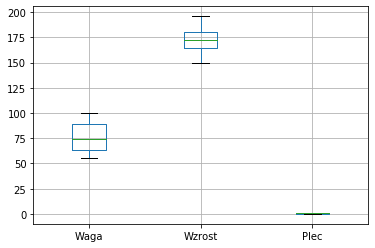

In [173]:
data_input.boxplot()

Na bazie wykresów box-plot można stwierdzić, że dane posiadają różniące się zakresy, co powoduje potrzebę ich skalowania. Warto zauważyć również, że rozkład klas w zbiorze jest równomierny (patrz: histogram)

## Zadanie 1

Proszę dokonać normalizacji zbioru danych za pomocą standaryzacji oraz narysować wykres box-plot dla wszystkich zmiennych. W jaki sposób zmieniły się dane? Co można powiedzieć o ich zakresach. W jakim celu dokonujemy normalizacji?

Dane PRZED standaryzacją:
   waga  wzrost  plec
0    55     160     1
1    78     180     0
2    55     150     1
3    99     196     0
4    90     180     0


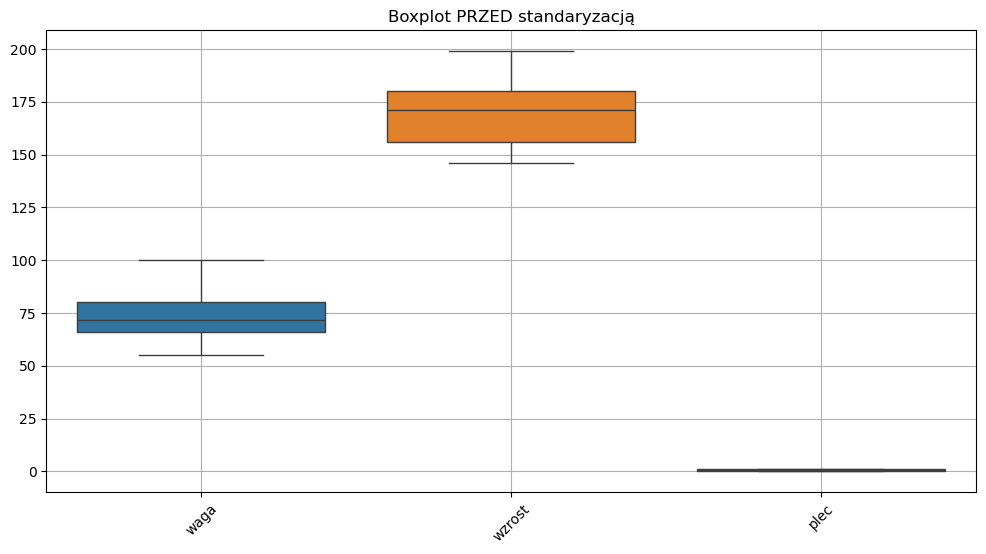

Dane PO standaryzacji:
       waga    wzrost  plec
0 -1.747530 -0.669387   1.0
1  0.454063  0.690305  -1.0
2 -1.747530 -1.349233   1.0
3  2.464214  1.778059  -1.0
4  1.602721  0.690305  -1.0


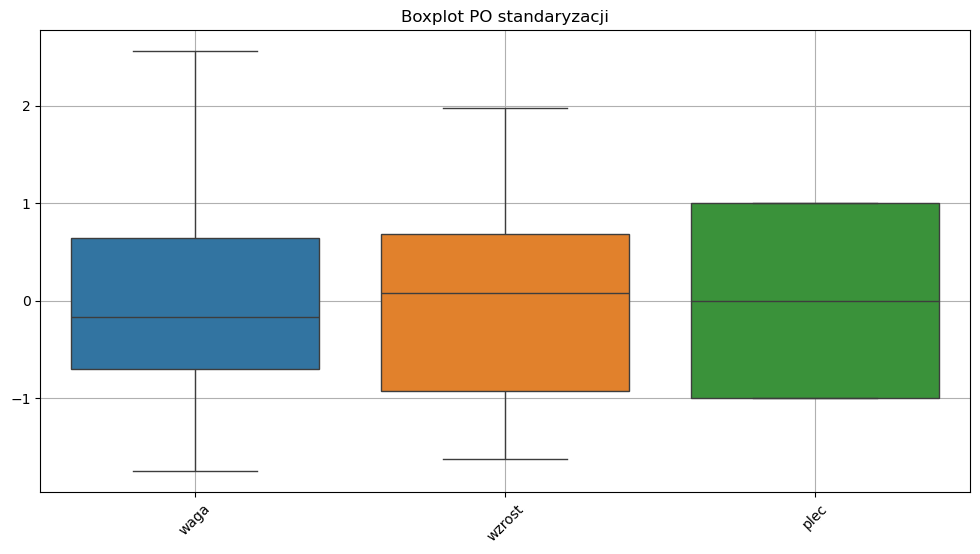

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Ankieta.csv')

df['plec'] = df['plec'].map({'Kobieta': 1, 'Mezczyzna': 0})

print("Dane PRZED standaryzacją:")
print(df.head())

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot PRZED standaryzacją")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Standaryzacja danych
scaler = StandardScaler()
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_scaled_array = scaler.fit_transform(df_numeric)
df_scaled = pd.DataFrame(df_scaled_array, columns=df_numeric.columns)

print("Dane PO standaryzacji:")
print(df_scaled.head())

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.title("Boxplot PO standaryzacji")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Zadanie 2

W tym zadaniu należy dokonać podziału zbioru danych na uczący oraz testowy. Zbiór uczący będzie służył do treningu klasyfikatora, a testowy do obliczenia ostatecznej skuteczności klasyfikacji. Prosze, by 80% próbek znalazło się w zbiorze uczącym, a 20% w testowym. Proszę zadbać o odpowiednią inicjalizacje generatora pseudolosowego

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['plec'])
y = df['plec']

# Podział na zbiory uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y            # proporcja klasy
)

print("Liczba próbek w zbiorze treningowym:", X_train.shape[0])
print("Liczba próbek w zbiorze testowym:", X_test.shape[0])

print("\nX_train:\n", X_train.head())
print("\ny_train:\n", y_train.head())


Liczba próbek w zbiorze treningowym: 62
Liczba próbek w zbiorze testowym: 16

X_train:
     waga  wzrost
33    85     180
27    62     170
0     55     160
67    65     167
76    77     190

y_train:
 33    0
27    1
0     1
67    1
76    1
Name: plec, dtype: int64


## Zadanie 3

W tym zadaniu należy dokonać klasyfikacji danych za pomocą klasyfikatora SVC. Proszę obliczyć skuteczność klasyfikatora na danych po, oraz przed standaryzacją i porównać wyniki.

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# SVC bez standaryzacji
svc_no_scaling = SVC()
svc_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = svc_no_scaling.predict(X_test)
acc_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

print(f"Skuteczność SVC PRZED standaryzacją: {acc_no_scaling:.2f}")

# SVC po standaryzacji
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc_scaled = SVC()
svc_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svc_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Skuteczność SVC PO standaryzacji: {acc_scaled:.2f}")


Skuteczność SVC PRZED standaryzacją: 0.88
Skuteczność SVC PO standaryzacji: 1.00


## Zadanie 4

Proszę dobrać odpowiedni parametr C (proszę spróbować z zakresu 0, 5 z krokiem co 0.5). Dla każdego C proszę wyrysować hiperpłaszczyznę utworzoną przez klasyfikator (w formie animimacji, lub inaczej). Proszę przedstawić na wykresie jak zmieniała się skuteczność klasyfikatora w zależności od parametru C. Jakie wnioski można wyciągnąć? Jak wpływa parametr C na wynik?

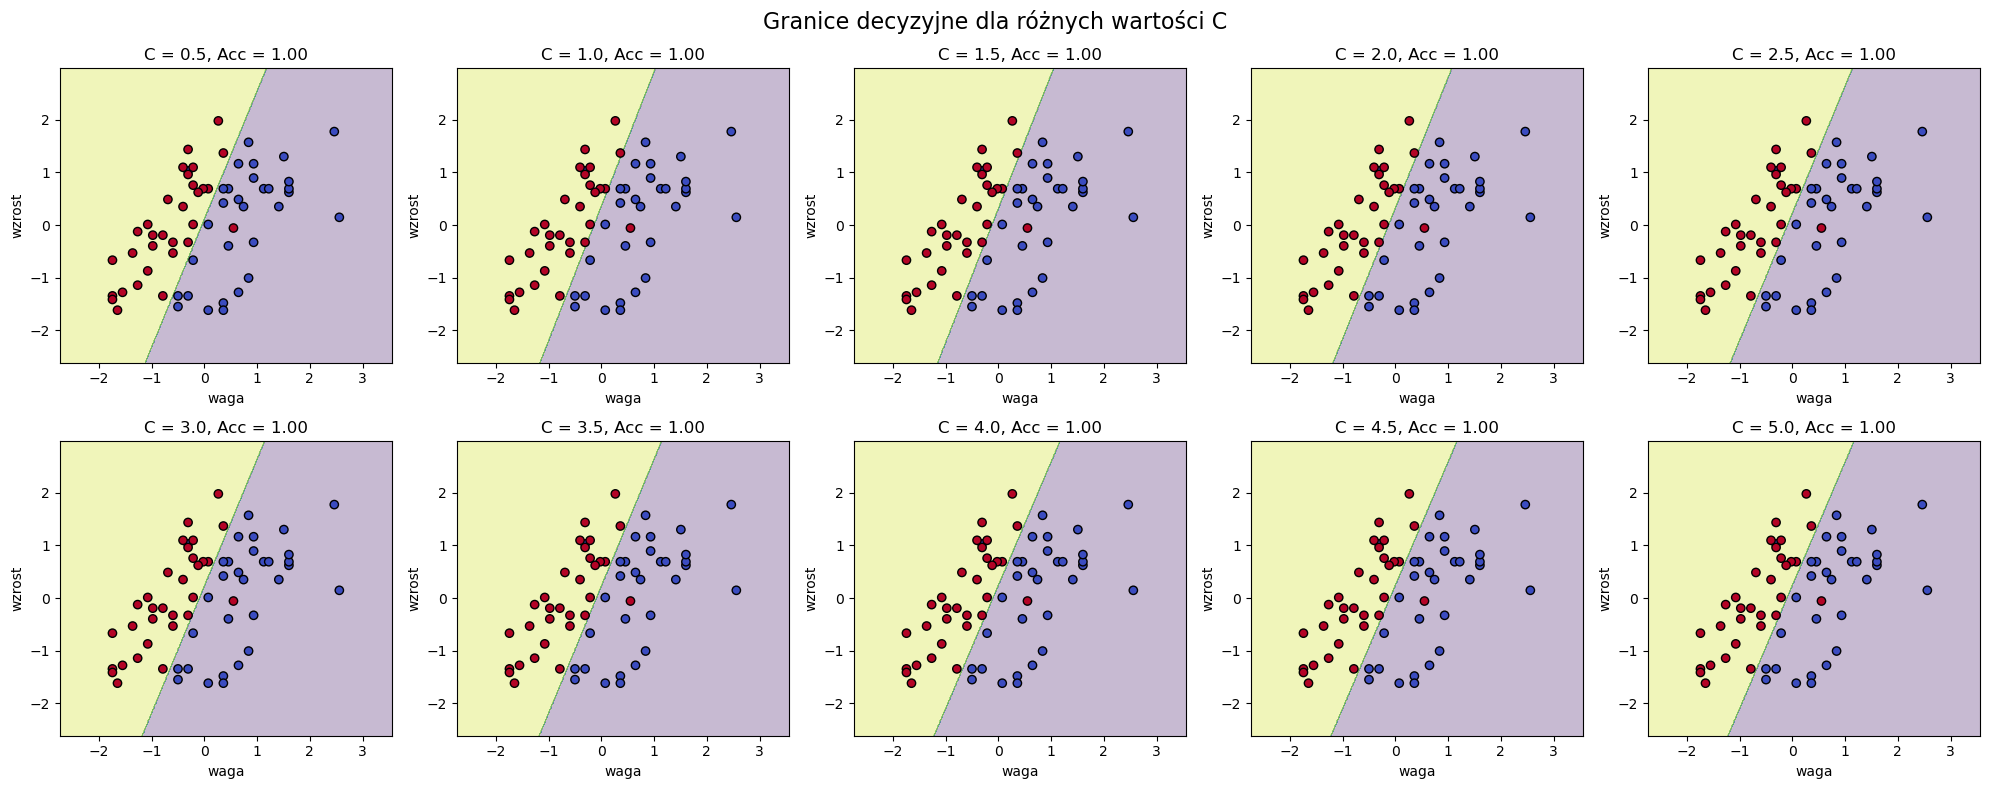

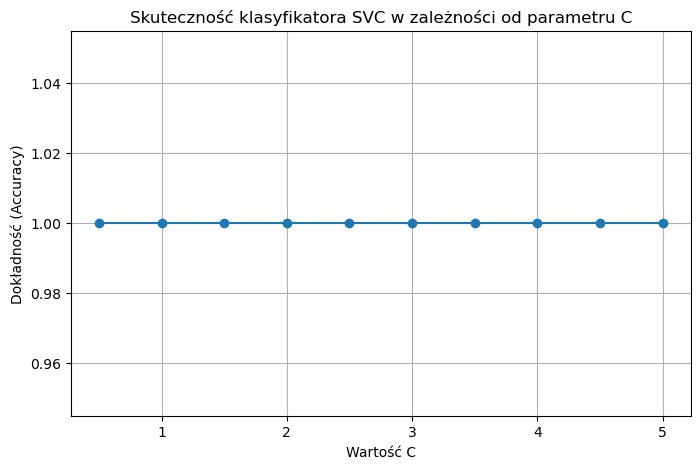

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Wybieramy tylko 2 cechy do wizualizacji (np. Waga i Wzrost)
features = ['waga', 'wzrost']
X_vis = df[features]
y_vis = df['plec']

# Standaryzujemy te 2 cechy
scaler_vis = StandardScaler()
X_vis_scaled = scaler_vis.fit_transform(X_vis)

# Podział na zbiory uczący/testowy
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis_scaled, y_vis, test_size=0.2, random_state=42, stratify=y_vis
)

# Zakres wartości C
C_values = np.arange(0.5, 5.5, 0.5)

# Zapisywanie dokładności
accuracies = []

# Tworzymy siatkę do granicy decyzyjnej
xx, yy = np.meshgrid(
    np.linspace(X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1, 500),
    np.linspace(X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1, 500)
)

# Tworzymy subploty
fig, axes = plt.subplots(2, int(len(C_values)/2), figsize=(20, 8))

for idx, C in enumerate(C_values):
    svc = SVC(C=C, kernel='linear')
    svc.fit(X_train_vis, y_train_vis)

    # Dokładność
    y_pred = svc.predict(X_test_vis)
    acc = accuracy_score(y_test_vis, y_pred)
    accuracies.append(acc)

    # Predykcja na siatce (dla granicy decyzyjnej)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax = axes.flat[idx]

    # Granicaa decyzyjna
    ax.contourf(xx, yy, Z, alpha=0.3)

    # Punkty treningowe
    scatter = ax.scatter(
        X_train_vis[:, 0], X_train_vis[:, 1],
        c=y_train_vis, cmap=plt.cm.coolwarm, edgecolors='k'
    )

    ax.set_title(f'C = {C}, Acc = {acc:.2f}')
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])

plt.suptitle('Granice decyzyjne dla różnych wartości C', fontsize=16)
plt.tight_layout()
plt.show()

# Wykres skuteczności względem parametru C
plt.figure(figsize=(8, 5))
plt.plot(C_values, accuracies, marker='o')
plt.title('Skuteczność klasyfikatora SVC w zależności od parametru C')
plt.xlabel('Wartość C')
plt.ylabel('Dokładność (Accuracy)')
plt.grid(True)
plt.show()


## Zadanie 5

Proszę dokonać pomiaru czasu wykonania algorytmu dla min. 2 różnych kerneli

In [11]:
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Lista kerneli do przetestowania
kernels = ['linear', 'rbf']

# Iterujemy po kernelach i mierzymy czas
for kernel in kernels:
    svc = SVC(kernel=kernel)

    start_time = time.time()
    # Trening modelu
    svc.fit(X_train_scaled, y_train)
    end_time = time.time()
    elapsed_time = end_time - start_time

    y_pred = svc.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    print(f"Kernel: {kernel}")
    print(f"  ➡️  Czas treningu: {elapsed_time:.4f} sekund")
    print(f"  ➡️  Dokładność: {acc:.2f}\n")

Kernel: linear
  ➡️  Czas treningu: 0.0000 sekund
  ➡️  Dokładność: 1.00

Kernel: rbf
  ➡️  Czas treningu: 0.0087 sekund
  ➡️  Dokładność: 1.00



## Zadanie 6

Analiza wektorów nośnych (support vectors). Wyodrębnij wektory nośne z wytrenowanego modelu używając właściwości `.support_vectors_`. Zwizualizuj położenie wektorów nośnych na wykresie, jaki procent danych stanowią wektory nośne?

# Dla Ankieta.csv

Wektory nośne (pierwsze 5):
 [[-0.52882188 -1.61512738]
 [-0.33764429  1.01461699]
 [-0.24205549 -0.71547799]
 [ 0.04471089 -0.02344   ]
 [ 0.33147727  0.3917828 ]]
Liczba wektorów nośnych: 23
Procent próbek będących wektorami nośnymi: 37.10%


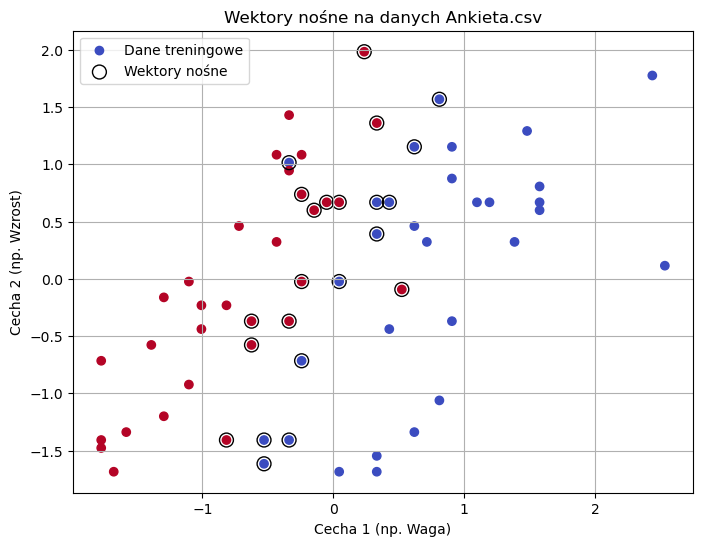

In [13]:
# Model SVC dla danych 'Ankieta.csv'
svc = SVC(kernel='linear', C=1)
svc.fit(X_train_scaled, y_train)

# Wektory nośne
support_vectors = svc.support_vectors_
print("Wektory nośne (pierwsze 5):\n", support_vectors[:5])

# Procent danych, które są wektorami nośnymi
n_support_vectors = len(support_vectors)
total_samples = X_train_scaled.shape[0]
percentage_support_vectors = (n_support_vectors / total_samples) * 100

print(f"Liczba wektorów nośnych: {n_support_vectors}")
print(f"Procent próbek będących wektorami nośnymi: {percentage_support_vectors:.2f}%")

# Wizualizacja (dla 2D: Waga i Wzrost)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='coolwarm', label='Dane treningowe')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Wektory nośne')
plt.title('Wektory nośne na danych Ankieta.csv')
plt.xlabel('Cecha 1 (np. Waga)')
plt.ylabel('Cecha 2 (np. Wzrost)')
plt.legend()
plt.grid(True)
plt.show()

### Dla zbioru *dataR2* proszę dokonać podobnej analizy danych. Opis zbioru: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

# Dla dataR2.csv

Liczba wektorów nośnych (dataR2): 53
Procent próbek będących wektorami nośnymi (dataR2): 57.61%


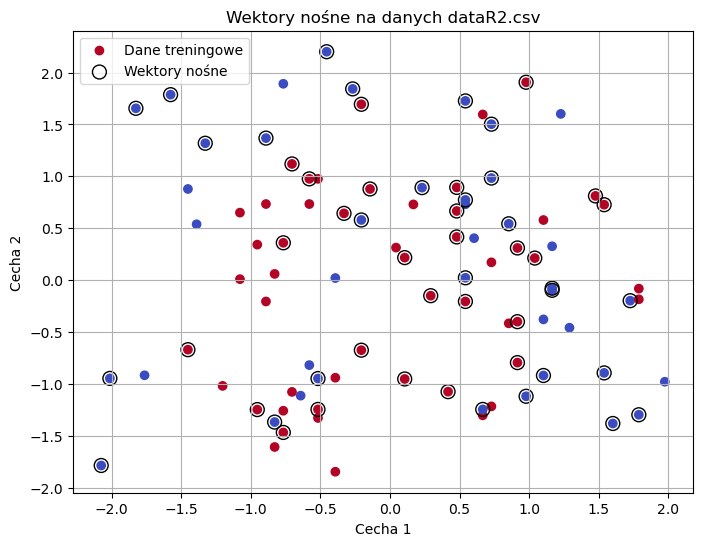

In [17]:
# Wczytanie danych dataR2.csv
dataR2 = pd.read_csv('dataR2.csv')

# Podgląd danych
dataR2.head()

# Zakładamy, że kolumna 'Classification' to etykiety
X_r2 = dataR2.drop(columns=['Classification'])
y_r2 = dataR2['Classification']

# Standaryzacja
scaler_r2 = StandardScaler()
X_r2_scaled = scaler_r2.fit_transform(X_r2)

# Podział na trening/test
X_train_r2, X_test_r2, y_train_r2, y_test_r2 = train_test_split(
    X_r2_scaled, y_r2, test_size=0.2, random_state=42, stratify=y_r2
)
# Model SVC dla dataR2
svc_r2 = SVC(kernel='linear', C=1)
svc_r2.fit(X_train_r2, y_train_r2)

# Wektory nośne
support_vectors_r2 = svc_r2.support_vectors_

# Procent danych będących wektorami nośnymi
n_support_vectors_r2 = len(support_vectors_r2)
total_samples_r2 = X_train_r2.shape[0]
percentage_support_vectors_r2 = (n_support_vectors_r2 / total_samples_r2) * 100

print(f"Liczba wektorów nośnych (dataR2): {n_support_vectors_r2}")
print(f"Procent próbek będących wektorami nośnymi (dataR2): {percentage_support_vectors_r2:.2f}%")
plt.figure(figsize=(8, 6))
plt.scatter(X_train_r2[:, 0], X_train_r2[:, 1], c=y_train_r2, cmap='coolwarm', label='Dane treningowe')
plt.scatter(support_vectors_r2[:, 0], support_vectors_r2[:, 1], s=100, facecolors='none', edgecolors='k', label='Wektory nośne')
plt.title('Wektory nośne na danych dataR2.csv')
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.legend()
plt.grid(True)
plt.show()


## Zadanie 7

Proszę zwizualizować dane dla 2 dowolnych zmiennych ze zbioru

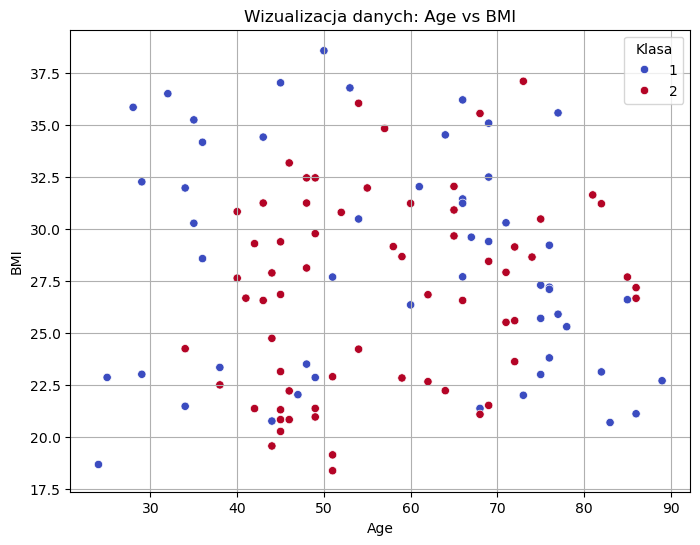

In [18]:
# Wybieramy dwie cechy. 'Age' i 'BMI'
feature_x = 'Age'
feature_y = 'BMI'

# Wykres punktowy
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=dataR2,
    x=feature_x,
    y=feature_y,
    hue='Classification',  # Kolorowanie wg etykiety
    palette='coolwarm'
)

plt.title(f'Wizualizacja danych: {feature_x} vs {feature_y}')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title='Klasa')
plt.grid(True)
plt.show()


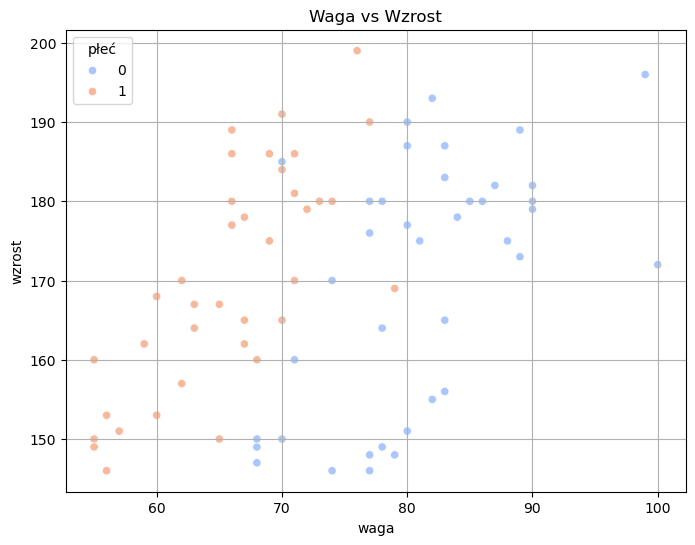

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='waga',
    y='wzrost',
    hue='plec',
    palette='coolwarm'
)

plt.title('Waga vs Wzrost')
plt.xlabel('waga')
plt.ylabel('wzrost')
plt.legend(title='płeć')
plt.grid(True)
plt.show()


## Zadanie 8

Proszę dokonać standaryzacji danych

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled, columns=X.columns).head()


,waga,wzrost
0,-1.747530,-0.669387
1,0.454063,0.690305
2,-1.747530,-1.349233
3,2.464214,1.778059
4,1.602721,0.690305


## Zadanie 9

Trenowanie klasyfikatora. Proszę dokonać treningu klasyfikatora na zbiorze treningowym (X_train, y_train). Proszę użyć różnych wartości parametru C, gamma oraz kernel. Pełna dokumentacja klasyfikatora: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html Wyniki proszę podsumować na odpowiednim wykresie lub tabeli. Test skuteczności klasyfikatora proszę dokonać na zbiorze testowym (X_test, y_test).

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Definiujemy parametry do przetestowania
C_values = [0.1, 1, 10]
gamma_values = ['scale', 'auto']
kernels = ['linear', 'rbf', 'poly']

results = []

# Iterujemy po parametrach
for kernel in kernels:
    for C in C_values:
        for gamma in gamma_values:
            svc = SVC(kernel=kernel, C=C, gamma=gamma)
            svc.fit(X_train_scaled, y_train)

            y_pred = svc.predict(X_test_scaled)
            acc = accuracy_score(y_test, y_pred)

            # Dodajemy wynik do listy
            results.append({
                'Kernel': kernel,
                'C': C,
                'Gamma': gamma,
                'Accuracy': acc
            })

            print(f'Kernel: {kernel}, C: {C}, Gamma: {gamma} => Accuracy: {acc:.2f}')

Kernel: linear, C: 0.1, Gamma: scale => Accuracy: 0.94
Kernel: linear, C: 0.1, Gamma: auto => Accuracy: 0.94
Kernel: linear, C: 1, Gamma: scale => Accuracy: 1.00
Kernel: linear, C: 1, Gamma: auto => Accuracy: 1.00
Kernel: linear, C: 10, Gamma: scale => Accuracy: 1.00
Kernel: linear, C: 10, Gamma: auto => Accuracy: 1.00
Kernel: rbf, C: 0.1, Gamma: scale => Accuracy: 0.94
Kernel: rbf, C: 0.1, Gamma: auto => Accuracy: 0.94
Kernel: rbf, C: 1, Gamma: scale => Accuracy: 1.00
Kernel: rbf, C: 1, Gamma: auto => Accuracy: 1.00
Kernel: rbf, C: 10, Gamma: scale => Accuracy: 1.00
Kernel: rbf, C: 10, Gamma: auto => Accuracy: 1.00
Kernel: poly, C: 0.1, Gamma: scale => Accuracy: 1.00
Kernel: poly, C: 0.1, Gamma: auto => Accuracy: 1.00
Kernel: poly, C: 1, Gamma: scale => Accuracy: 0.94
Kernel: poly, C: 1, Gamma: auto => Accuracy: 0.94
Kernel: poly, C: 10, Gamma: scale => Accuracy: 1.00
Kernel: poly, C: 10, Gamma: auto => Accuracy: 1.00


## Zadanie 10

Należy wyznaczyć macierze pomyłek dla klasyfikatora. Proszę dokonać wizualizacji wraz z kolorami na wykresie. Przykłady: 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

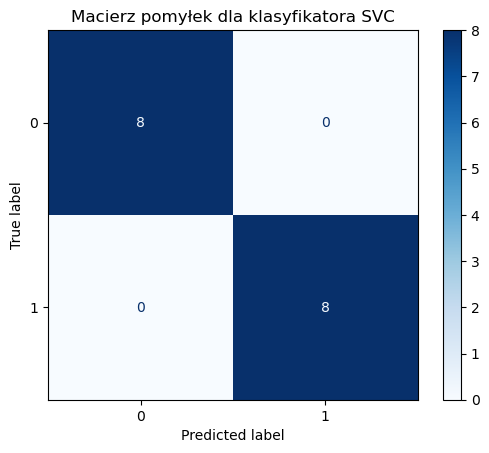

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Przewidujemy etykiety na zbiorze testowym
y_pred = svc.predict(X_test_scaled)

# Tworzymy macierz pomyłek
cm = confusion_matrix(y_test, y_pred)

# Wizualizacja macierzy pomyłek
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Macierz pomyłek dla klasyfikatora SVC')
plt.grid(False)
plt.show()
